In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import signal
from collections import OrderedDict

def load_vicon_data(label_file_name, record_time_sec, joint_name = 'hip_moment'):
    output_df = pd.read_csv(label_file_name,
                            delimiter=',',
                            skiprows=lambda x: x in range(0, record_time_sec*1000 + 10), # skip force plate data and 10 rows of header
                            encoding_errors='ignore') # Add this line to ignore encoding errors
    output_df = output_df.fillna(0) # fill NaN with 0

    if joint_name == 'hip_moment':
        columns = [54, 6] # 54 for right hip, 6 for left hip
        output_buffer = output_df.values[:, columns]/1000 # divide by 1000 to convert to Nm
    elif joint_name == 'knee_moment':
        columns = [57, 9]
        output_buffer = output_df.values[:, columns]/1000 #
    elif joint_name == 'ankle_moment':
        columns = [51, 3]
        output_buffer = output_df.values[:, columns]/1000 #
    elif joint_name == 'hip_angle': # 74 for right hip, 26 for left hip
        columns = [74, 26]
        output_buffer = output_df.values[:, columns]
    elif joint_name == 'knee_angle':
        columns = [77, 29]
        output_buffer = output_df.values[:, columns]
    elif joint_name == 'ankle_angle':
        columns = [59, 11]
        output_buffer = output_df.values[:, columns]

    output_buffer[:, 1] *= -1 # Flip the sign of left hip moment
    output_buffer = lowpass_filter(output_buffer, order=4, cutoff_freq=6, sampling_freq=100)
    return output_buffer

def lowpass_filter(data, order=4, cutoff_freq=6, sampling_freq=100):

    nyquist_freq = sampling_freq / 2
    normalized_cutoff_freq = cutoff_freq / nyquist_freq
    b, a = signal.butter(order, normalized_cutoff_freq, btype='low')
    filtered_data = np.zeros_like(data)
    for i in range(0, data.shape[1]):
        filtered_data[:, i] = signal.filtfilt(b, a, data[:, i])
    
    return filtered_data

ik & id results 

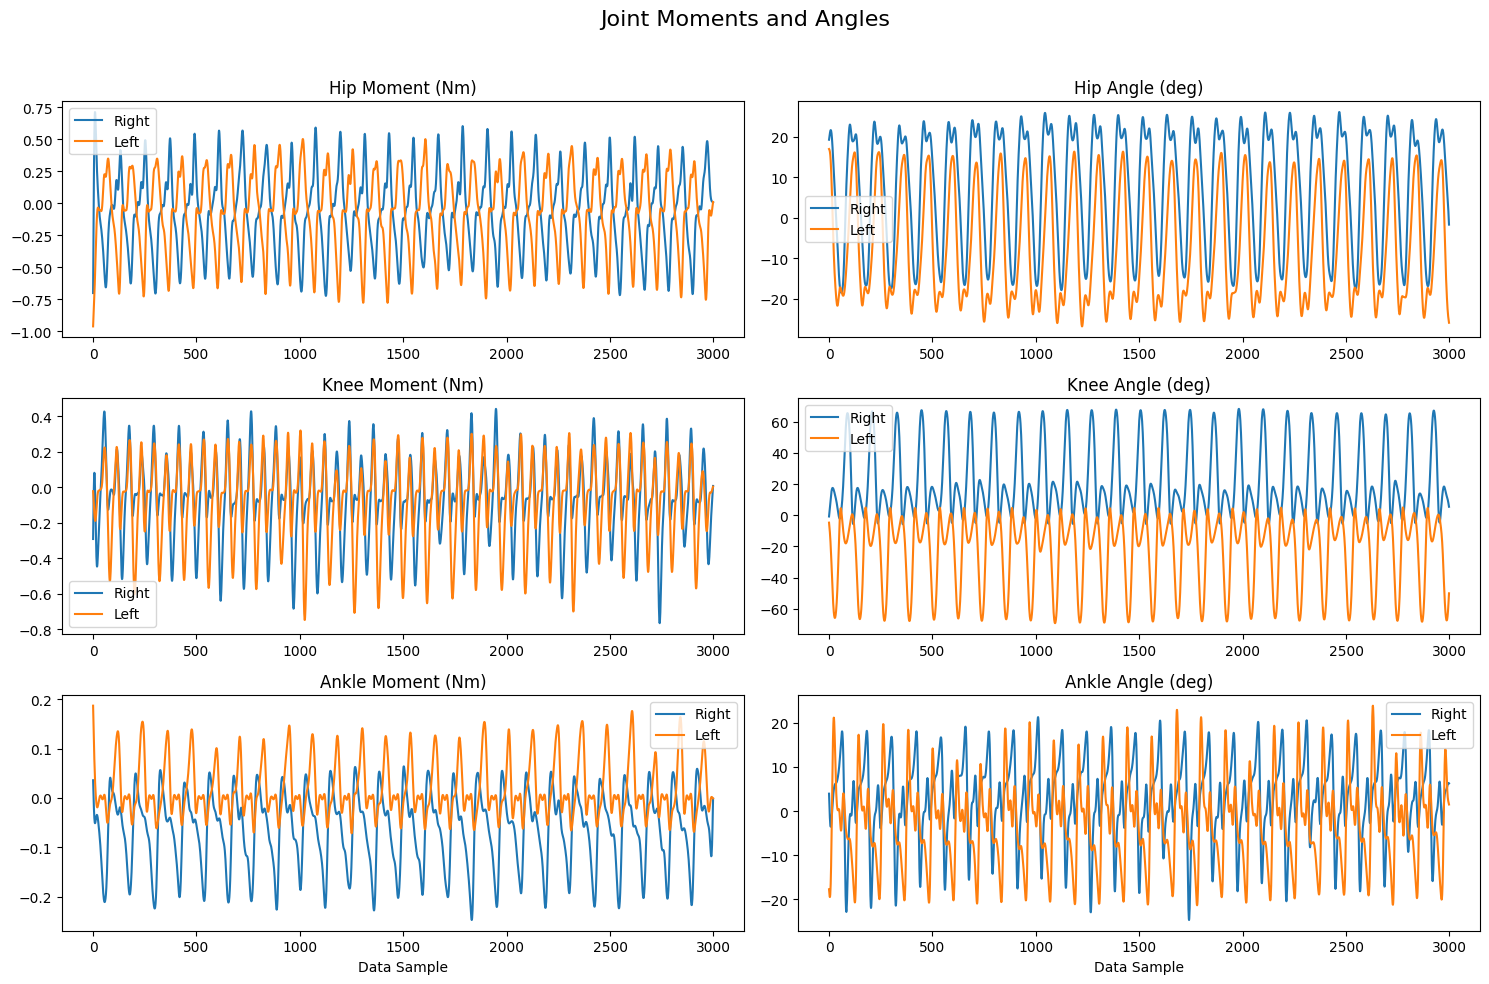

In [14]:
label_file_name = 'AB01_Jimin_1p0mps_1.csv'
trial_time_sec = 30

hip_moment_data = load_vicon_data(label_file_name, trial_time_sec, joint_name='hip_moment')
knee_moment_data = load_vicon_data(label_file_name, trial_time_sec, joint_name='knee_moment')
ankle_moment_data = load_vicon_data(label_file_name, trial_time_sec, joint_name='ankle_moment')
hip_angle_data = load_vicon_data(label_file_name, trial_time_sec, joint_name='hip_angle')
knee_angle_data = load_vicon_data(label_file_name, trial_time_sec, joint_name='knee_angle')
ankle_angle_data = load_vicon_data(label_file_name, trial_time_sec, joint_name='ankle_angle')

# Create a 3x2 subplot
fig, axs = plt.subplots(3, 2, figsize=(15, 10))
fig.suptitle('Joint Moments and Angles', fontsize=16)

# Plot hip moment and angle
axs[0, 0].plot(lowpass_filter(hip_moment_data))
axs[0, 0].set_title('Hip Moment (Nm)')
axs[0, 0].legend(['Right', 'Left'])
axs[0, 1].plot(hip_angle_data)
axs[0, 1].set_title('Hip Angle (deg)')
axs[0, 1].legend(['Right', 'Left'])

# Plot knee moment and angle
axs[1, 0].plot(lowpass_filter(knee_moment_data))
axs[1, 0].set_title('Knee Moment (Nm)')
axs[1, 0].legend(['Right', 'Left'])
axs[1, 1].plot(knee_angle_data)
axs[1, 1].set_title('Knee Angle (deg)')
axs[1, 1].legend(['Right', 'Left'])

# Plot ankle moment and angle
axs[2, 0].plot(lowpass_filter(ankle_moment_data))
axs[2, 0].set_title('Ankle Moment (Nm)')
axs[2, 0].set_xlabel('Data Sample')
axs[2, 0].legend(['Right', 'Left'])
axs[2, 1].plot(ankle_angle_data)
axs[2, 1].set_title('Ankle Angle (deg)')
axs[2, 1].set_xlabel('Data Sample')
axs[2, 1].legend(['Right', 'Left'])

# Adjust layout to prevent overlapping titles
plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust rect to make space for suptitle
plt.show()

Motor encoder values

In [ ]:
input_file_name = '/home/metamobility3/Changseob/biotorque/in-lab_version/biotorque_ten_subjects/AB04_Changseob/1p0mps/trial_2/Input/motor_positions.csv'

input_df = pd.read_csv(input_file_name,
                       delimiter=',',
                       header=0) # Load all headers by setting header to the first row (index 0)
print(input_df.head())

# Plotting the motor data
fig_motor, axs_motor = plt.subplots(2, 2, figsize=(15, 10))
fig_motor.suptitle('Motor Data', fontsize=16)

# Plot mtr_pos_L
axs_motor[0, 0].plot(input_df['time'], input_df['mtr_pos_L'])
axs_motor[0, 0].set_title('Motor Position Left (mtr_pos_L)')
axs_motor[0, 0].set_xlabel('Time (s)')
axs_motor[0, 0].set_ylabel('Angle (deg)')

# Plot mtr_pos_R
axs_motor[0, 1].plot(input_df['time'], input_df['mtr_pos_R'])
axs_motor[0, 1].set_title('Motor Position Right (mtr_pos_R)')
axs_motor[0, 1].set_xlabel('Time (s)')
axs_motor[0, 1].set_ylabel('Angle (deg)')

# Plot mtr_vel_L
axs_motor[1, 0].plot(input_df['time'], input_df['mtr_vel_L'])
axs_motor[1, 0].set_title('Motor Velocity Left (mtr_vel_L)')
axs_motor[1, 0].set_xlabel('Time (s)')
axs_motor[1, 0].set_ylabel('Angular velocity (deg/s)')

# Plot mtr_vel_R
axs_motor[1, 1].plot(input_df['time'], input_df['mtr_vel_R'])
axs_motor[1, 1].set_title('Motor Velocity Right (mtr_vel_R)')
axs_motor[1, 1].set_xlabel('Time (s)')
axs_motor[1, 1].set_ylabel('Angular velocity (deg/s)')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

ParserError: Error tokenizing data. C error: Expected 1 fields in line 3, saw 21


ik vs. motor encoder - Position

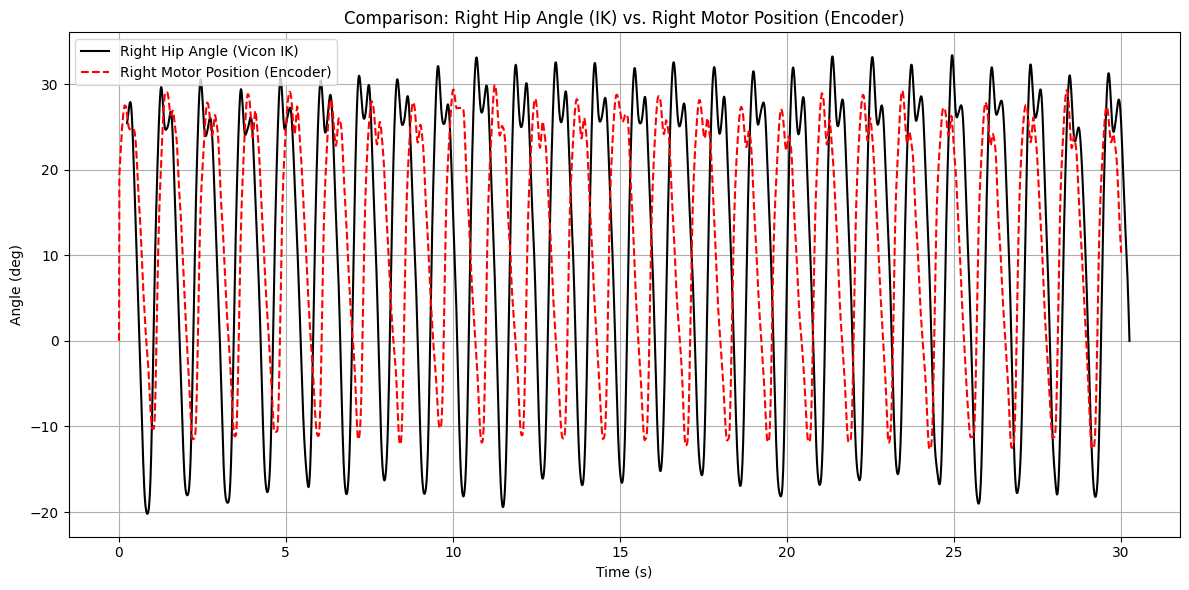

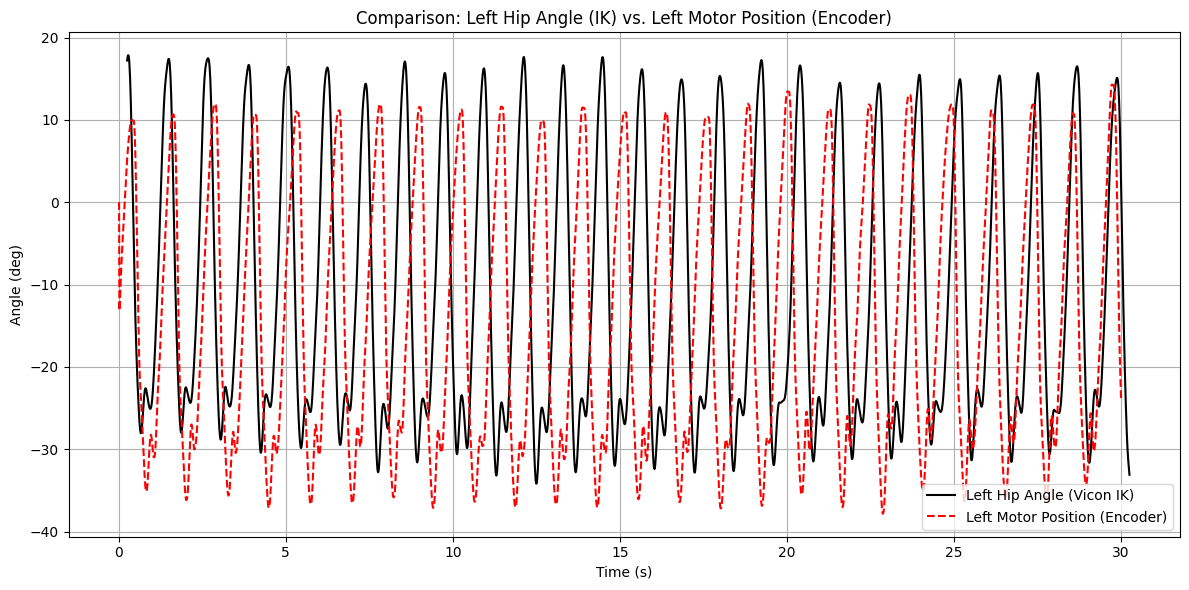

In [ ]:
# Create a time vector for the Vicon data
time_vicon = np.linspace(0, trial_time_sec, hip_angle_data.shape[0])

####### Manual parameters for scaling and offsetting #######
delay = 0.25
scale_offset = -10
scale_factor = 1.2

# Create a new figure and axes for the comparison plot
fig_compare, ax_compare = plt.subplots(figsize=(12, 6))

# Plot Right Hip Angle (Vicon)
ax_compare.plot(time_vicon + delay, (hip_angle_data[:, 0] - scale_offset) * scale_factor + scale_offset, label='Right Hip Angle (Vicon IK)', color = 'black')

# Plot Right Motor Position (Encoder)
ax_compare.plot(input_df['time'], -input_df['mtr_pos_R'], label='Right Motor Position (Encoder)', color = 'red', linestyle='--')

# Add labels, title, and legend
ax_compare.set_xlabel('Time (s)')
ax_compare.set_ylabel('Angle (deg)')
ax_compare.set_title('Comparison: Right Hip Angle (IK) vs. Right Motor Position (Encoder)')
ax_compare.legend()
ax_compare.grid(True)

plt.tight_layout()
plt.show()

####### Manual parameters for scaling and offsetting #######
delay = 0.25
scale_offset = 10
scale_factor = 1.2

# Create a new figure and axes for the comparison plot
fig_compare, ax_compare = plt.subplots(figsize=(12, 6))

# Plot Right Hip Angle (Vicon)
ax_compare.plot(time_vicon + delay, (hip_angle_data[:, 1] - scale_offset) * scale_factor + scale_offset, label='Left Hip Angle (Vicon IK)', color = 'black')

# Plot Right Motor Position (Encoder)
ax_compare.plot(input_df['time'], -input_df['mtr_pos_L'], label='Left Motor Position (Encoder)', color = 'red', linestyle='--')

# Add labels, title, and legend
ax_compare.set_xlabel('Time (s)')
ax_compare.set_ylabel('Angle (deg)')
ax_compare.set_title('Comparison: Left Hip Angle (IK) vs. Left Motor Position (Encoder)')
ax_compare.legend()
ax_compare.grid(True)

plt.tight_layout()
plt.show()


ik vs. motor encoder - Velocity

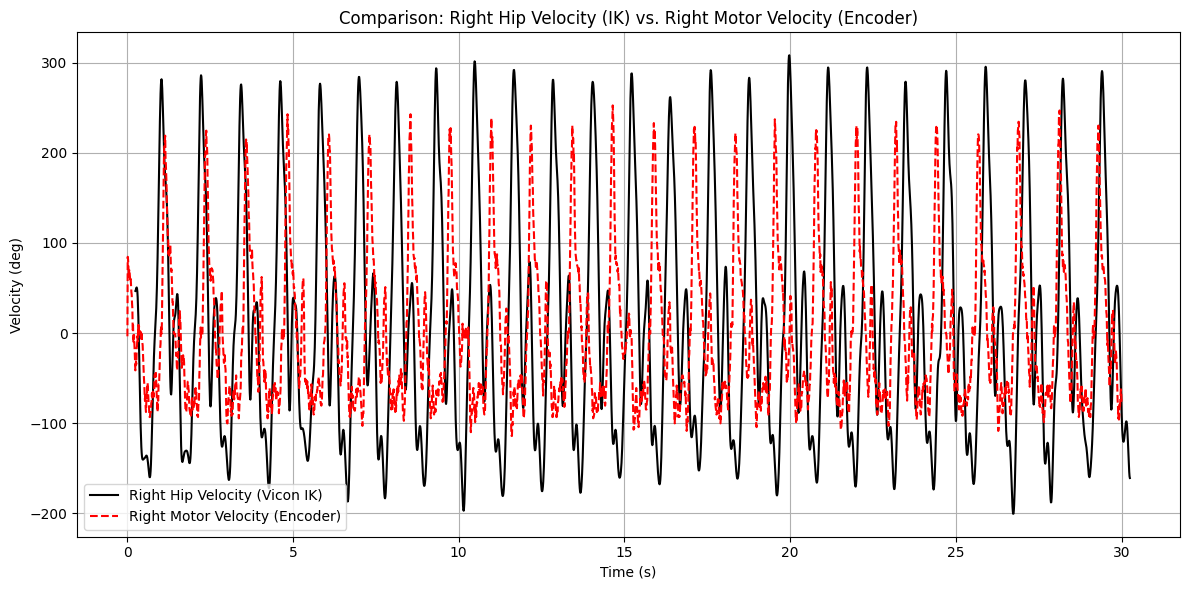

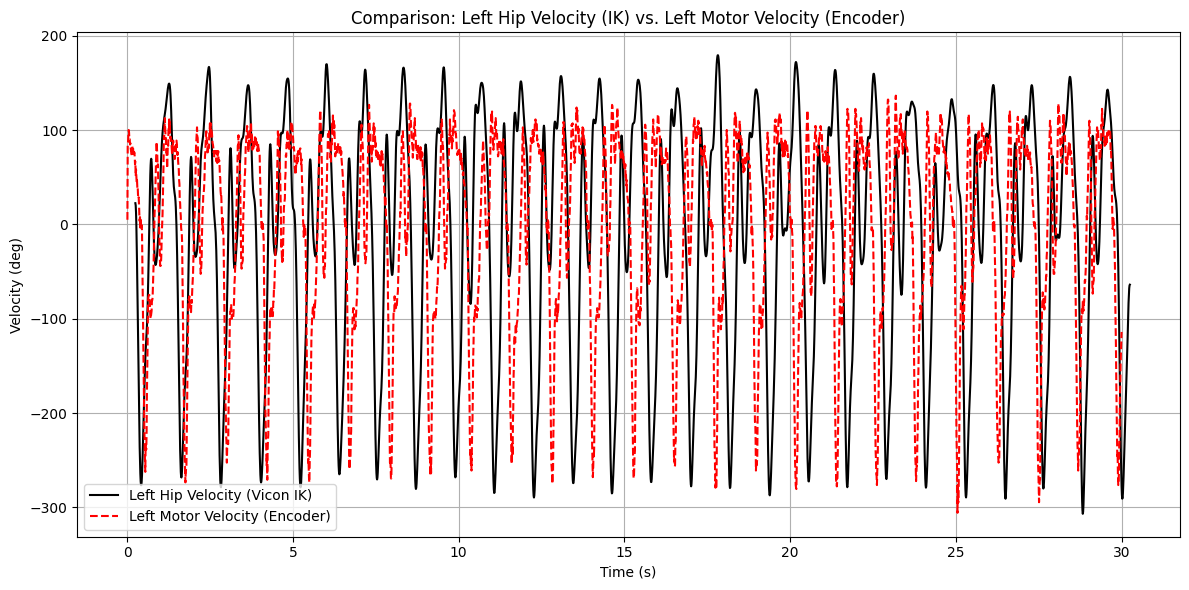

In [ ]:
# Calculate hip velocity from hip angle data
dt_vicon = 0.01
hip_velocity_data = np.gradient(hip_angle_data, dt_vicon, axis=0)

# Create a time vector for the Vicon data
time_vicon = np.linspace(0, trial_time_sec, hip_angle_data.shape[0])

####### Manual parameters for scaling and offsetting #######
delay = 0.25
scale_offset = -20
scale_factor = 1.5

# Create a new figure and axes for the comparison plot
fig_compare, ax_compare = plt.subplots(figsize=(12, 6))

# Plot Right Hip Velocity (Vicon)
ax_compare.plot(time_vicon + delay, (hip_velocity_data[:, 0] - scale_offset) * scale_factor + scale_offset, label='Right Hip Velocity (Vicon IK)', color = 'black')

# Plot Right Motor Position (Encoder)
ax_compare.plot(input_df['time'], -input_df['mtr_vel_R'], label='Right Motor Velocity (Encoder)', color = 'red', linestyle='--')

# Add labels, title, and legend
ax_compare.set_xlabel('Time (s)')
ax_compare.set_ylabel('Velocity (deg)')
ax_compare.set_title('Comparison: Right Hip Velocity (IK) vs. Right Motor Velocity (Encoder)')
ax_compare.legend()
ax_compare.grid(True)

plt.tight_layout()
plt.show()

####### Manual parameters for scaling and offsetting #######
delay = 0.25
scale_offset = 20
scale_factor = 1.5

# Create a new figure and axes for the comparison plot
fig_compare, ax_compare = plt.subplots(figsize=(12, 6))

# Plot Right Hip Velocity (Vicon)
ax_compare.plot(time_vicon + delay, (hip_velocity_data[:, 1] - scale_offset) * scale_factor + scale_offset, label='Left Hip Velocity (Vicon IK)', color = 'black')

# Plot Right Motor Position (Encoder)
ax_compare.plot(input_df['time'], -input_df['mtr_vel_L'], label='Left Motor Velocity (Encoder)', color = 'red', linestyle='--')

# Add labels, title, and legend
ax_compare.set_xlabel('Time (s)')
ax_compare.set_ylabel('Velocity (deg)')
ax_compare.set_title('Comparison: Left Hip Velocity (IK) vs. Left Motor Velocity (Encoder)')
ax_compare.legend()
ax_compare.grid(True)

plt.tight_layout()
plt.show()
